<a href="https://colab.research.google.com/github/ykitaguchi77/Colab_Scripts/blob/master/Face_detection_using_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

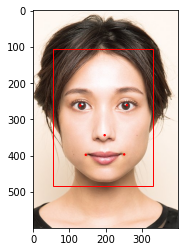

In [31]:
#Use web images
import io
import tempfile
import requests
import cv2
from matplotlib import pyplot as plt

def imread_web(url):
    # 画像をリクエストする
    res = requests.get(url)
    img = None
    # Tempfileを作成して即読み込む
    with tempfile.NamedTemporaryFile(dir='./') as fp:
        fp.write(res.content)
        fp.file.seek(0)
        img = cv2.imread(fp.name)
    return img

# face detection with mtcnn on a photograph
!pip install mtcnn
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2

# draw an image with detected objects
def draw_image_with_boxes(img, result_list):
    # plot the image
    pyplot.imshow(img)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

url = 'https://www.biteki.com/wp-content/uploads/2018/09/p102-1.jpg'
img = cv2.cvtColor(imread_web(url), cv2.COLOR_BGR2RGB)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(img)
# display faces on the original image
draw_image_with_boxes(img, faces)

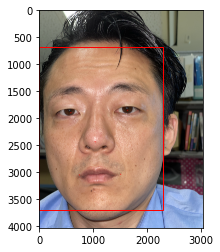

In [22]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

filename = "/content/drive/MyDrive/Deep_learning/Face_Images/IMG_4087.JPG"
pixels = cv2.imread(filename)
# load image from file
#pixels = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)